<a href="https://colab.research.google.com/github/user1855/DMC_courses/blob/main/PEA/Supervised%20Models/C2_Notebook_Regresi%C3%B3n_Lineal_con_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regresión Lineal con Sklearn**


### Importar paquetes requeridos

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


<h2 id="understanding_data">Comprendiendo los datos</h2>

### `FuelConsumption.csv`:
Hemos descargado un conjunto de datos de consumo de combustible, **`FuelConsumption.csv`**, que contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para nuevos vehículos ligeros para la venta al por menor en Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Leyendo los datos de entreada</h2>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumption.csv to FuelConsumption (1).csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['FuelConsumption.csv']),encoding='latin-1', sep = ',')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="data_exploration">Exploración de datos</h2>
Primero hagamos una exploración descriptiva de nuestros datos.

In [ ]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Vamos a seleccionar algunas funciones para explorar más:

In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

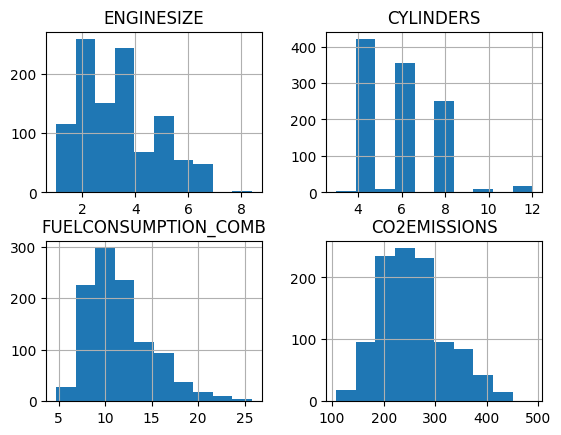

In [ ]:
cdf.hist()

Nosotros podemos graficar cada una de esas características:

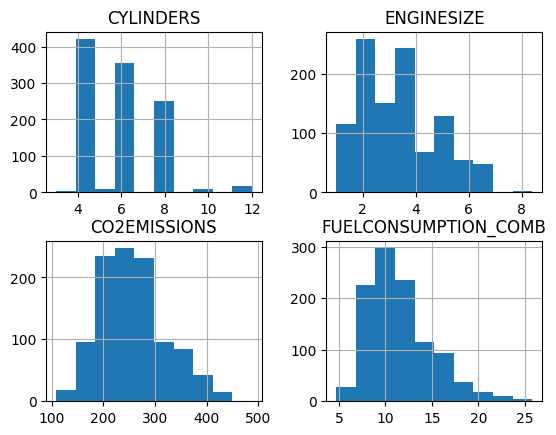

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Ahora, vamos a graficar cada una de las características vs la emisión, para observar cuán lineal es su relación:

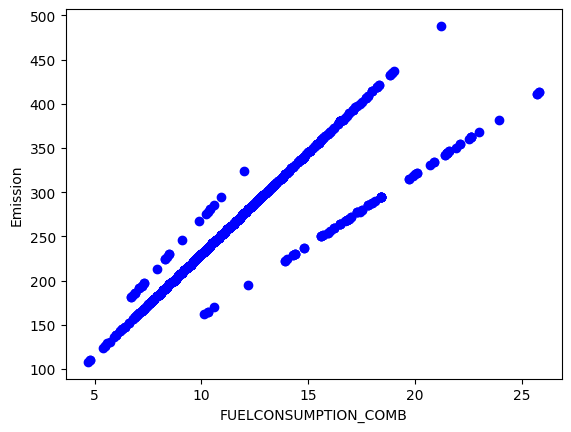

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

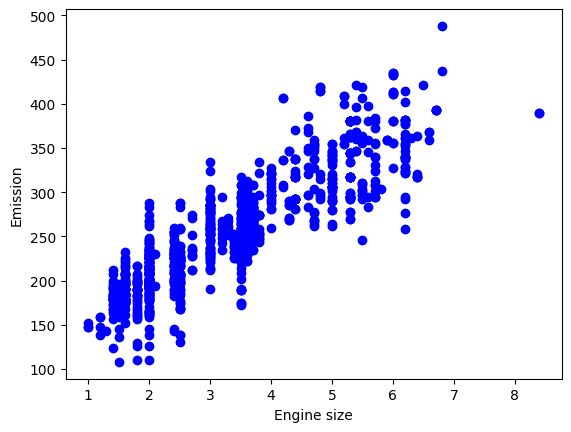

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creando el conjunto de datos de entrenamiento y prueba
La división Train/Test Split implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba, respectivamente, que son mutuamente excluyentes. Después de lo cual, entrena con el conjunto Train y prueba con el conjunto Test.
Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no es parte del conjunto de datos que se ha utilizado para entrenar los datos. Es más realista para problemas del mundo real.

Esto significa que conocemos el resultado de cada punto de datos en este conjunto de datos, ¡por lo que es genial probarlo! Y dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, es realmente una prueba fuera de muestra.

Dividamos nuestro conjunto de datos en conjuntos de train/test, el 80% de los datos completos para entrenamiento y el 20% para prueba. Creamos una máscara para seleccionar filas aleatorias usando la función __np.random.rand()__: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
len(train)

842

In [ ]:
len(test)

225

<h2 id="multiple_regression">Modelo de regresión Múltiple</h2>

En realidad, hay múltiples variables que predicen la emisión de Co2. Cuando hay más de una variable independiente presente, el proceso se llama regresión lineal múltiple. Por ejemplo, prediciendo la emisión de CO2 utilizando FUELCONSUMPTION_COMB, EngineSize y Cylinders de automóviles. Lo bueno aquí es que la regresión lineal múltiple es la extensión del modelo de regresión lineal simple.

#### Modelando
Usando el paquete <b>sklearn</b> para modelar la data.

In [ ]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (x, y)

LinearRegression()

CO2EMISSIONS = B0 + B1 * ENGINESIZE + B2 * CYLINDERS + B3 * FUELCONSUMPION_COMB

In [ ]:
regr.intercept_

array([67.05950129])

In [ ]:
regr.coef_

array([[12.38812855,  5.87861346,  9.84802964]])

In [ ]:

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[12.38812855  5.87861346  9.84802964]]
Intercept:  [67.05950129]


CO2EMISSIONS = 67.05950129 + 12.38812855 * ENGINESIZE + 5.87861346 * CYLINDERS + 9.84802964 * FUELCONSUMPTION_COMB

Como se mencionó anteriormente, __Coefficient__ and __Intercept__ , son los parámetros de la línea de ajuste. 
Dado que es una regresión lineal múltiple, con 3 parámetros, y sabiendo que los parámetros son la intersección y los coeficientes del hiperplano, <i>sklearn</i> puede estimarlos a partir de nuestros datos. <i>Scikit-learn</i> utiliza el método de mínimos cuadrados ordinarios para resolver este problema.

#### Mínimos Cuadrados Ordinarios/Ordinary Least Squares (OLS)
OLS es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. OLS elige los parámetros de una función lineal de un conjunto de variables explicativas minimizando la suma de los cuadrados de las diferencias entre la variable <i>target</i> dependiente y las predichas por la función lineal. En otras palabras, intenta minimizar la suma de los errores al cuadrado (SSE) o el error al cuadrado medio (MSE) entre la variable objetivo <i>(y)</i> y nuestra salida predicha ($\hat{y}$) sobre todas las muestras en el conjunto de datos.

OLS puede encontrar los mejores parámetros utilizando los siguientes métodos:
   - Resolviendo los parámetros del modelo analíticamente usando ecuaciones de forma cerrada.
   - Usando de un algoritmo de optimización (Descenso de gradiente, Descenso de gradiente estocástico, Método de Newton, etc.)

#### Evaluación
comparamos los valores reales y los valores pronosticados para calcular la precisión de un modelo de regresión. Las métricas de evaluación proporcionan un papel clave en el desarrollo de un modelo, ya que proporcionan información sobre las áreas que requieren mejoras.

Existen diferentes métricas de evaluación del modelo, usamos MSE aquí para calcular la precisión de nuestro modelo en función del conjunto de pruebas: 
<ul>
    <li> Mean absolute error: Error absoluto medio es la media del valor absoluto de los errores. Esta es la métrica más fácil de entender, ya que es solo un error promedio.</li>
    <li> Mean Squared Error (MSE): Es la media del error cuadrado. Es más popular que el error absoluto medio porque el enfoque se orienta más hacia errores grandes. Esto se debe a que el término cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.</li>
    <li> Root Mean Squared Error (RMSE): Esta es la raíz cuadrada del error cuadrático medio.</li>
    <li> R-squared no es un error, pero es una métrica popular para la precisión de tu modelo. Representa lo cerca que están los datos de la línea de regresión ajustada. Cuanto más alto sea el R cuadrado, mejor se ajustará el modelo a tus datos. La mejor puntuación posible es 1.0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).</li>
</ul>

In [ ]:
regr.score(x,y)

0.864115304550962

In [ ]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
y_hat

array([[250.0787462 ],
       [210.90733637],
       [364.3220837 ],
       [317.07864892],
       [202.01287309],
       [213.83050866],
       [249.79349971],
       [274.92365815],
       [249.79349971],
       [286.74129372],
       [269.48955899],
       [341.92356086],
       [365.55883201],
       [340.42867357],
       [297.09734314],
       [251.76310564],
       [251.76310564],
       [261.61113528],
       [300.52853522],
       [374.42412324],
       [374.42412324],
       [198.07366124],
       [201.02807013],
       [204.96728198],
       [204.96728198],
       [231.08224339],
       [304.49898367],
       [313.36221035],
       [213.83050866],
       [248.80869674],
       [247.82389378],
       [258.65672639],
       [260.18078573],
       [309.42093394],
       [212.8457057 ],
       [215.80011459],
       [259.19598277],
       [253.28716498],
       [221.70893238],
       [354.37209806],
       [388.84020181],
       [352.40249213],
       [257.22637684],
       [250

In [ ]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('R2-score: %.2f' % regr.score(x, y))

Mean absolute error: 17.81
Residual sum of squares: 598.88
R2-score: 0.86


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# ¿Podría utilizar las variables categóricas?

Sí, transformándolas en variables dummy

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(1067, 13)

In [ ]:
# Convertir las variables categóricas en variables ficticias o dummies:

df_dummies = pd.get_dummies(df)

In [ ]:
df_dummies.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ACURA,MAKE_ASTON MARTIN,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,2.0,4,9.9,6.7,8.5,33,196,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,2.4,4,11.2,7.7,9.6,29,221,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2014,1.5,4,6.0,5.8,5.9,48,136,1,0,...,0,1,0,0,0,0,0,0,0,1
3,2014,3.5,6,12.7,9.1,11.1,25,255,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,3.5,6,12.1,8.7,10.6,27,244,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_dummies.shape

(1067, 752)

In [ ]:
df_dummies

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ACURA,MAKE_ASTON MARTIN,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,2.0,4,9.9,6.7,8.5,33,196,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,2.4,4,11.2,7.7,9.6,29,221,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2014,1.5,4,6.0,5.8,5.9,48,136,1,0,...,0,1,0,0,0,0,0,0,0,1
3,2014,3.5,6,12.7,9.1,11.1,25,255,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,3.5,6,12.1,8.7,10.6,27,244,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271,0,0,...,0,0,0,0,0,0,0,0,1,0
1063,2014,3.2,6,13.2,9.5,11.5,25,264,0,0,...,0,0,0,0,0,0,0,0,1,0
1064,2014,3.0,6,13.4,9.8,11.8,24,271,0,0,...,0,0,0,0,0,0,0,0,1,0
1065,2014,3.2,6,12.9,9.3,11.3,25,260,0,0,...,0,0,0,0,0,0,0,0,1,0
